In [1]:
%matplotlib inline

import os
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

DATA_RAW = Path(os.getcwd()) / os.pardir / "data" / "raw" / "consumption"
DATA_FINAL = Path(os.getcwd()) / os.pardir / "data" / "final" / "consumption"

# Datasets

 1. Training Conumption - `Given1`
 2. Public Test set - `Given2` (Note, contains all of Given 1 as well)
 3. Private Test set - `Secret` (Note, contains Given 1 and Given 2 as well)
 4. Weather - `Weather`
 4. Building Metadata - `metadata.csv`
 5. Public Holidays - `Holidays`

In [2]:
!tree -L 3 $DATA_RAW

/Users/bull/schneider/data-preparation/../data/raw/consumption
├── Given1
│   └── Series
│       ├── 1.csv
│       ├── 10.csv
│       ├── 100.csv
│       ├── 101.csv
│       ├── 102.csv
│       ├── 105.csv
│       ├── 106.csv
│       ├── 107.csv
│       ├── 108.csv
│       ├── 109.csv
│       ├── 11.csv
│       ├── 110.csv
│       ├── 111.csv
│       ├── 112.csv
│       ├── 115.csv
│       ├── 116.csv
│       ├── 117.csv
│       ├── 118.csv
│       ├── 119.csv
│       ├── 12.csv
│       ├── 120.csv
│       ├── 121.csv
│       ├── 122.csv
│       ├── 123.csv
│       ├── 124.csv
│       ├── 125.csv
│       ├── 126.csv
│       ├── 127.csv
│       ├── 128.csv
│       ├── 129.csv
│       ├── 13.csv
│       ├── 130.csv
│       ├── 131.csv
│       ├── 132.csv
│       ├── 134.csv
│       ├── 135.csv
│       ├── 136.csv
│       ├── 139.csv
│       ├── 14.csv
│       ├── 140.csv
│       ├── 141.csv
│       ├── 142.csv
│       ├── 143.csv
│       ├── 145.csv
│       ├── 146.csv
│       ├── 148.cs

│   └── Series
│       ├── 1.csv
│       ├── 10.csv
│       ├── 100.csv
│       ├── 101.csv
│       ├── 102.csv
│       ├── 105.csv
│       ├── 106.csv
│       ├── 107.csv
│       ├── 108.csv
│       ├── 109.csv
│       ├── 11.csv
│       ├── 110.csv
│       ├── 111.csv
│       ├── 112.csv
│       ├── 115.csv
│       ├── 116.csv
│       ├── 117.csv
│       ├── 118.csv
│       ├── 119.csv
│       ├── 12.csv
│       ├── 120.csv
│       ├── 121.csv
│       ├── 122.csv
│       ├── 123.csv
│       ├── 124.csv
│       ├── 125.csv
│       ├── 126.csv
│       ├── 127.csv
│       ├── 128.csv
│       ├── 129.csv
│       ├── 13.csv
│       ├── 130.csv
│       ├── 131.csv
│       ├── 132.csv
│       ├── 134.csv
│       ├── 135.csv
│       ├── 136.csv
│       ├── 139.csv
│       ├── 14.csv
│       ├── 140.csv
│       ├── 141.csv
│       ├── 142.csv
│       ├── 143.csv
│       ├── 145.csv
│       ├── 146.csv
│       ├── 148.csv
│       ├── 149.csv
│       ├── 15.csv
│       ├── 150.csv
│       ├── 1

# Dataset 1: Historical Consumption (Training)

Since the private set test, `Secret` contains all of the data we will just load that and use it for further subdivision.

In [3]:
dfs = []

for f in (DATA_RAW / 'Secret' / 'Series').glob('*.csv'):
    dfs.append(pd.read_csv(f, parse_dates=['Timestamp']))
    
consumption = pd.concat(dfs).sort_values(['SiteId', 'Timestamp'])

print(consumption.shape)
consumption.head()

(7869006, 4)


,SiteId,Timestamp,Value,To_Forecast
0,1,2014-09-03,9.096555e+05,Given
1,1,2014-09-04,1.748273e+06,Given
2,1,2014-09-05,NaN,Given
3,1,2014-09-06,NaN,Given
4,1,2014-09-07,NaN,Given


In [4]:
consumption.To_Forecast.value_counts()

Given         6559830
Forecast_1     654720
Forecast_2     654456
Name: To_Forecast, dtype: int64

In [5]:
consumption[consumption.To_Forecast != consumption.To_Forecast.shift(1)]

,SiteId,Timestamp,Value,To_Forecast
0,1,2014-09-03 00:00:00,9.096555e+05,Given
360,1,2015-08-29 00:00:00,7.413780e+06,Forecast_1
390,1,2015-09-28 00:00:00,6.543689e+06,Forecast_2
420,1,2015-10-28 00:00:00,6.246690e+06,Given
510,1,2016-01-26 00:00:00,8.397880e+06,Forecast_1
540,1,2016-02-25 00:00:00,8.230233e+06,Forecast_2
570,1,2016-03-26 00:00:00,1.593448e+06,Given
930,1,2017-03-21 00:00:00,1.035486e+06,Forecast_1
960,1,2017-04-20 00:00:00,8.950203e+05,Forecast_2
990,1,2017-05-20 00:00:00,8.735687e+06,Given


In [6]:
consumption.dropna(subset=['Value']).To_Forecast.value_counts()

Given         6473229
Forecast_1     645385
Forecast_2     644729
Name: To_Forecast, dtype: int64

In [7]:
train_mask = consumption.To_Forecast == 'Given'
test_public_mask = consumption.To_Forecast == 'Forecast_2'
test_private_mask = consumption.To_Forecast == 'Forecast_1'

# first 10 percent null by site
(consumption[train_mask].groupby('SiteId')
                        .Value
                        .apply(lambda x: pd.isnull(x).sum() / x.shape[0])
                        .sort_values(ascending=False)).head(10)

SiteId
293    0.105556
148    0.068889
93     0.063985
223    0.058696
12     0.057778
19     0.052772
21     0.051111
174    0.049718
62     0.049689
22     0.047089
Name: Value, dtype: float64

In [8]:
# first 10 percent null by site
(consumption[test_private_mask].groupby('SiteId')
                        .Value
                        .apply(lambda x: pd.isnull(x).sum() / x.shape[0])
                        .sort_values(ascending=False)).head(10)

SiteId
288    0.812500
47     0.433333
65     0.229167
145    0.166667
21     0.158333
70     0.116667
134    0.109375
275    0.091667
212    0.079613
20     0.075149
Name: Value, dtype: float64

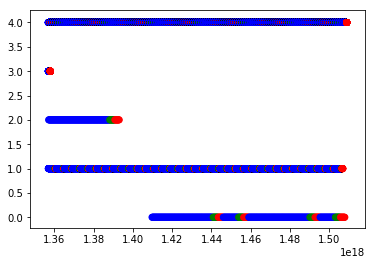

In [9]:
for i, site in enumerate(consumption.SiteId.unique()[:5]):

    to_plot = consumption[(consumption.SiteId == site)]
    
    plt.scatter(to_plot.Timestamp.astype(int),
                [i] * to_plot.shape[0],
                c=to_plot.To_Forecast.replace({'Forecast_1': 'g', 'Forecast_2': 'r', 'Given': 'b'}).values,
                alpha=0.5)

## Generate random index

In [10]:
rng = np.random.RandomState(900)
idx = rng.permutation(np.arange(consumption.shape[0]))
idx

consumption.index = pd.Series(idx, name='obs_id')

consumption.head()

,SiteId,Timestamp,Value,To_Forecast
obs_id,,,,
744519,1,2014-09-03,9.096555e+05,Given
7627564,1,2014-09-04,1.748273e+06,Given
7034705,1,2014-09-05,NaN,Given
5995486,1,2014-09-06,NaN,Given
7326510,1,2014-09-07,NaN,Given


# Metadata

 - Remove type of Forecast (competitors can infer from submission formats)
 - Use comma separated instead of semicolon

In [11]:
meta_data = pd.read_csv(DATA_RAW / 'metadata.csv', sep=',', index_col=0)

# meta_data.drop(['Type_Forecast'], axis=1, inplace=True)

# meta_data.to_csv(DATA_FINAL / "public" / "metadata.csv")

In [12]:
# no
(meta_data.Type_Forecast
          .value_counts())

(meta_data.reset_index().groupby('Type_Forecast').SiteId.nunique())

Type_Forecast
ite_10         71
ite_360        71
ite_40         71
non_ite_10     18
non_ite_360    18
non_ite_40     18
Name: SiteId, dtype: int64

In [13]:
rng = np.random.RandomState(98798)

public_sites = []
private_sites = []

for tfc in meta_data.Type_Forecast.unique():
    possible_ids = meta_data[(meta_data.Type_Forecast == tfc)].index.unique().values
    
    if tfc.startswith('non'):
        private_sites += possible_ids.tolist()
    else:
        public_sites += rng.choice(possible_ids, int(len(possible_ids) * 0.8)).tolist()
        private_sites += list(set(possible_ids.tolist()) - set(public_sites))

In [14]:
print(len(public_sites))
print(len(private_sites))

168
151


# Generate Sequence ID

In [15]:
# forecast items where the previous item was "Given" indicates transition.
sequences = ((consumption.To_Forecast != 'Given') & (consumption.To_Forecast.shift(1) == 'Given')).cumsum()
consumption['ForecastId'] = sequences

## Save competitions files

In [16]:
consumption = consumption[['SiteId', 'Timestamp', 'ForecastId', 'Value', 'To_Forecast']]

train = consumption[consumption.To_Forecast == 'Given']

test = consumption[consumption.To_Forecast.str.startswith('Forecast')]

public_subset_idx = (test.To_Forecast == 'Forecast_1').to_frame()

In [17]:
# 60% of evals in publc, 40% in private
public2set = rng.choice(consumption.ForecastId.unique(), int(0.6 * consumption.ForecastId.nunique()))
public2set

array([1686, 5712, 6270, ..., 1933,  874, 3218])

In [18]:
public_subset_idx_2 = (test.ForecastId.isin(public2set)).to_frame()

In [19]:
public_subset_idx_3 = (test.SiteId.isin(public_sites)).to_frame()

In [20]:
sub_format = test.copy()
sub_format.Value = 0.0

In [21]:
sub_format.shape

(1309176, 5)

In [22]:
public_subset_idx.shape

(1309176, 1)

In [23]:
train.head()

,SiteId,Timestamp,ForecastId,Value,To_Forecast
obs_id,,,,,
744519,1,2014-09-03,0,9.096555e+05,Given
7627564,1,2014-09-04,0,1.748273e+06,Given
7034705,1,2014-09-05,0,NaN,Given
5995486,1,2014-09-06,0,NaN,Given
7326510,1,2014-09-07,0,NaN,Given


In [24]:
train.ForecastId.unique()

array([   0,    1,    2, ..., 6971, 6972, 6973])

In [25]:
sub_format.ForecastId.unique()

array([   1,    2,    3, ..., 6972, 6973, 6974])

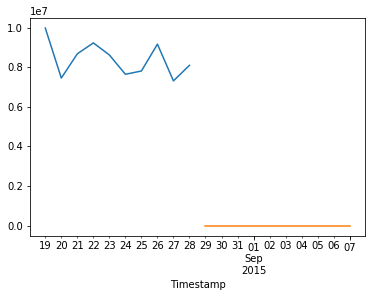

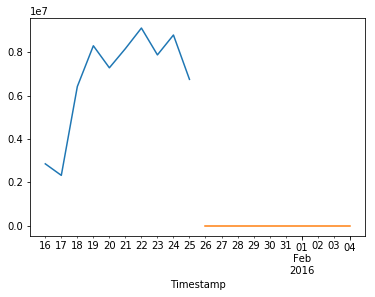

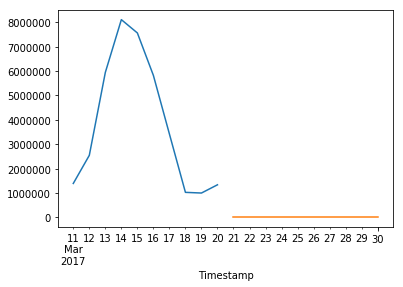

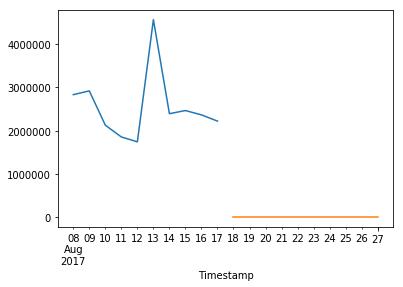

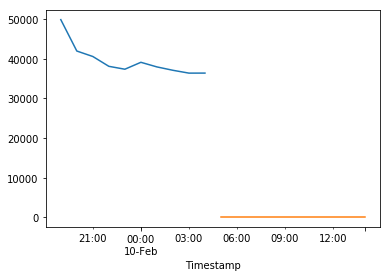

In [26]:
for fid in train.ForecastId.unique()[:5]:
    train[train.ForecastId == fid].tail(10).set_index('Timestamp').Value.plot()
    sub_format[sub_format.ForecastId == (fid + 1)].head(10).set_index('Timestamp').Value.plot()
    
    plt.show()

In [27]:
train.ForecastId = train.ForecastId + 1

/Users/bull/anaconda3/envs/schneider/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [28]:
assert (train.groupby('ForecastId').apply(lambda x: x.Timestamp.diff().dropna().unique()[0]) == \
        sub_format.groupby('ForecastId').apply(lambda x: x.Timestamp.diff().dropna().unique()[0])).all()

assert (train.groupby('ForecastId').apply(lambda x: x.Timestamp.diff().dropna().nunique()) == 1).all()

assert (train.groupby('ForecastId').SiteId.nunique() == 1).all()

assert (train.groupby('ForecastId').SiteId.first() == \
        sub_format.groupby('ForecastId').SiteId.first()).all()

In [29]:
train.drop(["To_Forecast"], axis=1, inplace=True)
test.drop("To_Forecast", axis=1, inplace=True)
sub_format.drop("To_Forecast", axis=1, inplace=True)

/Users/bull/anaconda3/envs/schneider/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/bull/anaconda3/envs/schneider/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
print(train.shape)
print(test.shape)
print(public_subset_idx.shape)
print(sub_format.shape)

(6559830, 4)
(1309176, 4)
(1309176, 1)
(1309176, 4)


In [31]:
train.head()

,SiteId,Timestamp,ForecastId,Value
obs_id,,,,
744519,1,2014-09-03,1,9.096555e+05
7627564,1,2014-09-04,1,1.748273e+06
7034705,1,2014-09-05,1,NaN
5995486,1,2014-09-06,1,NaN
7326510,1,2014-09-07,1,NaN


In [32]:
train.to_csv(DATA_FINAL / "public" / "train.csv")
sub_format.to_csv(DATA_FINAL / "public" / "submission_format.csv")

test.to_csv(DATA_FINAL / "private" / "test.csv")
public_subset_idx.to_csv(DATA_FINAL / "private" / "public_subset.csv")

In [33]:
public_subset_idx_2.to_csv(DATA_FINAL / "private" / "public_subset_2.csv")
public_subset_idx_3.to_csv(DATA_FINAL / "private" / "public_subset_3.csv")

In [34]:
print(sub_format.head().to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>SiteId</th>
      <th>Timestamp</th>
      <th>ForecastId</th>
      <th>Value</th>
    </tr>
    <tr>
      <th>obs_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1677832</th>
      <td>1</td>
      <td>2015-08-29</td>
      <td>1</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>5379616</th>
      <td>1</td>
      <td>2015-08-30</td>
      <td>1</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>496261</th>
      <td>1</td>
      <td>2015-08-31</td>
      <td>1</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>4567147</th>
      <td>1</td>
      <td>2015-09-01</td>
      <td>1</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>3684873</th>
      <td>1</td>
      <td>2015-09-02</td>
      <td>1</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>


In [35]:
!head {DATA_FINAL / "public" / "submission_format.csv"}

obs_id,SiteId,Timestamp,ForecastId,Value
1677832,1,2015-08-29 00:00:00,1,0.0
5379616,1,2015-08-30 00:00:00,1,0.0
496261,1,2015-08-31 00:00:00,1,0.0
4567147,1,2015-09-01 00:00:00,1,0.0
3684873,1,2015-09-02 00:00:00,1,0.0
4698291,1,2015-09-03 00:00:00,1,0.0
1129255,1,2015-09-04 00:00:00,1,0.0
834539,1,2015-09-05 00:00:00,1,0.0
3293948,1,2015-09-06 00:00:00,1,0.0


# Submission format period per ForecastId

In [36]:
fmt = pd.read_csv(DATA_FINAL / "public" / "submission_format.csv", index_col=0, parse_dates=["Timestamp"])

assert (fmt.groupby('ForecastId').apply(lambda x: x.Timestamp.diff().dropna().nunique()) == 1).all()
forecast_frequency = fmt.groupby('ForecastId').apply(lambda x: x.Timestamp.diff().dropna().unique()[0])
forecast_frequency.name = 'ForecastPeriodNS'

forecast_frequency.astype(int).to_frame().to_csv(DATA_FINAL / "public" / "submission_frequency.csv")

/Users/bull/anaconda3/envs/schneider/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [37]:
!head {DATA_FINAL / "public" / "submission_frequency.csv"}

ForecastId,ForecastPeriodNS
1,86400000000000
2,86400000000000
3,86400000000000
4,86400000000000
5,3600000000000
6,3600000000000
7,3600000000000
8,3600000000000
9,3600000000000


In [38]:
sff = pd.read_csv(DATA_FINAL / "public" / "submission_frequency.csv", index_col=0)
pd.to_timedelta(sff.ForecastPeriodNS).value_counts()

0 days 00:15:00    5444
0 days 01:00:00    1306
1 days 00:00:00     224
Name: ForecastPeriodNS, dtype: int64

## Test Metric

In [39]:
test.groupby('ForecastId').count().Value.max()

192

In [40]:
%load_ext autoreload
import sys

sys.path.append(str(Path(os.getcwd() + "/../metric/").resolve()))

%autoreload 1
%aimport metrics

In [ ]:
tt = pd.read_csv("")

In [42]:
test_vals = test.values
tt_vals = tt.values

NameError: name 'tt' is not defined

In [ ]:
# test the submission format
metrics.weighted_rmse(test_vals, tt_vals)

In [ ]:
# should be zero
metrics.weighted_rmse(tt_vals, tt_vals)

# Holidays

 - Only change is to use properly escaped comma separated file instead of semi-colons (for consistency for the competitors)

In [43]:
holidays = pd.read_csv(DATA_RAW / 'Holidays' / 'holidays.csv', sep=';')

holidays.to_csv(DATA_FINAL / "public" / "holidays.csv")

In [44]:
holidays.head()

,Date,Holiday,SiteId
0,2016-01-01,New year,1
1,2016-01-18,"Birthday of Martin Luther King, Jr.",1
2,2016-02-15,Washington's Birthday,1
3,2016-05-30,Memorial Day,1
4,2016-07-04,Independence Day,1


# Weather

 - Coalese into single data frame
 - For each forecast period, drop any weather data during that period (so that it is not improperly used for forecasting. **Note: We are not longer doing this based on the assumption that algos will have a "forecast" available to them of the weather**

In [45]:
dfs = []

for f in (DATA_RAW / 'Weather').glob('*.csv'):
    dfs.append(pd.read_csv(f, sep=';', parse_dates=['Timestamp']))
    
weather = pd.concat(dfs).sort_values(['SiteId', 'Timestamp'])

print(weather.shape)

(20017278, 4)


In [46]:
## Remove weather that overlaps with test periods + sites

In [47]:
# from tqdm import tqdm_notebook

# for forecast_id in tqdm_notebook(sub_format.ForecastId.unique()):
#     f_min = sub_format[sub_format.ForecastId == forecast_id].Timestamp.min()
#     f_max = sub_format[sub_format.ForecastId == forecast_id].Timestamp.max()
#     site_id = sub_format[sub_format.ForecastId == forecast_id].SiteId.values[0]
    
#     weather = weather[~((weather.SiteId == site_id) & (weather.Timestamp > f_min) & (weather.Timestamp < f_max))]
    

In [48]:
weather.to_csv(DATA_FINAL / "public" / "weather.csv")

In [49]:
weather.head()

,Timestamp,Temperature,Distance,SiteId
78064,2013-12-31 19:00:00,-7.2,24.889929,1
86746,2013-12-31 19:00:00,-8.3,23.303097,1
90002,2013-12-31 19:00:00,-7.8,20.952256,1
90003,2013-12-31 19:00:00,-8.0,20.952256,1
100541,2013-12-31 19:34:00,-8.1,16.610602,1


# Json Args

In [50]:
import json
with open(DATA_FINAL/"public"/"read_kwargs.json", "w+") as f:
    json.dump(dict(parse_dates=["Timestamp"]), f)